## Model Selection & Evaluation

<hr>

### Agenda
1. Cross Validation 
2. Hyperparameter Tuning  
3. Model Evaluation 
4. Model Persistance 
5. Validation Curves
6. Learning Curves

<hr>

### 1. Cross Validation
* 简单的模特欠拟合，训练数据和验证数据的准确性差别不大；但是，准确率并不是那么好，这种情况是低方差异和高偏差。

* 在向复杂模型迈进时，精度会提高。但是，训练数据和验证数据的准确性之间的差距会增加，这种情况具有很大方差和低偏差。

<img src="https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/image/biasvariance.png" width="400px">

* 我们需要比较各种模型以找到最佳型号。

* 我们需要比较某一特定模型的所有超参数。

* 用于训练的数据不应用于验证。

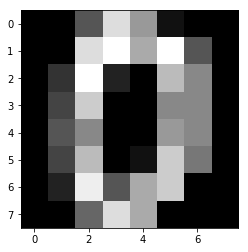

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0],cmap='gray')

In [2]:
dt = DecisionTreeClassifier(max_depth=10)
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
dt.score(testX,testY)

0.8377777777777777

In [4]:
dt.score(trainX,trainY)

0.9866369710467706

* 降低模型复杂度（这里是降低树的深度）

In [5]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
dt.score(testX,testY)

0.8066666666666666

In [7]:
dt.score(trainX,trainY)

0.8990348923533779

* 观察：随着复杂性的降低，训练集和验证集准确性的差距也随之降低

### （1）Cross Validation API
* 将数据拆分为k个部分。

* 使用k - 1个部分训练模型

* 使用第k部分进行验证

* 多次重复上述步骤以获得一般化行为

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, digits.data, digits.target)
scores.mean()

0.7463225795212435

### （2）Cross-validate Function : Scores for multiple matrices

In [9]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro', 'accuracy']
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.01999998, 0.01699853, 0.01599693, 0.01699829, 0.01799512]),
 'score_time': array([0.00300074, 0.00300121, 0.00200176, 0.00300169, 0.00100398]),
 'test_accuracy': array([0.75      , 0.67403315, 0.78272981, 0.76470588, 0.75492958]),
 'test_precision_macro': array([0.75745025, 0.71462031, 0.79070872, 0.78727012, 0.77072095]),
 'test_recall_macro': array([0.74873874, 0.67403904, 0.78265551, 0.76357143, 0.75680672]),
 'train_accuracy': array([0.90369853, 0.89407666, 0.90125174, 0.92777778, 0.88834951]),
 'train_precision_macro': array([0.9079362 , 0.8975591 , 0.90490749, 0.931221  , 0.89615475]),
 'train_recall_macro': array([0.90367662, 0.89354   , 0.90110497, 0.92752685, 0.8888177 ])}

### （3）Stratification for dealing with imbalanced Classes
* StratifiedKFold 
  - Class frequencies are preserved in data splitting在数据分割中保留类频率

In [10]:
import numpy as np
Y = np.append(np.ones(12),np.zeros(6))
X = np.ones((18,3))
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [11]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

### 2. Hyperparameter Tuning超参调优
* 模型参数是通过基于数据的学习算法学习的
* 需要配置超参数
* 超参数是数据相关的，并且需要多次实验才能找到最佳参数
* sklearn提供GridSerach以查找最佳超参数

#### （1）Exhaustive GridSearch穷举网格搜索（最常用）
* 按顺序搜索所有已配置的参数
* 适用于所有可能的参数组合

In [12]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)
dt = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)
grid_search.fit(digits.data,digits.target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 30, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [13]:
grid_search.best_params_

{'max_depth': 25}

In [14]:
grid_search.best_score_

0.7879799666110183

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### （2）RandomizedSearch随机网格搜索
* 与GridSearch不同，并非所有参数都经过试用和测试

* 而是从指定的分布中采样固定数量的参数设置。

##### Comparing GridSearch and RandomSearchCV

In [16]:
from time import time
#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [19]:
X = digits.data
Y = digits.target
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
param_dist

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x1aa672ae5f8>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen at 0x1aa672ae748>}

In [20]:
rf = RandomForestClassifier(n_estimators=20)
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 6.08 seconds for 20 candidates parameter settings.


In [21]:
random_search.best_score_

0.9321090706733445

In [22]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 20.42 seconds for 72 candidate parameter settings.


In [23]:
grid_search.best_score_

0.9382303839732888

### 3. Model Evaluation
* 评估模型预测质量的三种不同方法

   - 估计器的得分方法，配置默认方法。如 r2_score用于回归，分类accuracy 
   
   - cross_validate或cross_val_score等模型评估工具也会返回accuracy
   
   - Metrices模块具有丰富的各种预测误差计算技术

In [24]:
trainX, testX, trainY, testY = train_test_split(X,Y)
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### * （1）技术1 - 使用score 函数

In [25]:
rf.score(testX,testY)

0.9644444444444444

#### * （2）技术2 - 使用如上所述的cross_val_score函数

In [26]:
cross_val_score(rf,X,Y,cv=5)

array([0.92857143, 0.85359116, 0.93593315, 0.94957983, 0.90985915])

## 用于理解指标的癌症预测样本（分类问题）

In [27]:
from sklearn.datasets import load_breast_cancer
dt = DecisionTreeClassifier()
cancer_data = load_breast_cancer()
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
pred = dt.predict(testX)
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

#### （3）技术3 - 使用metrices（非常重要，实际中常使用）
#### Classfication metrices
* （3.1）Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification )

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.951048951048951

* （3.2）Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN（混淆矩阵）
  - True Positive (TP), Actual class is 1 & prediction is also 1
  - True Negative (TN), Actual class is 0 & prediction is also 0
  - False Positive (FP), Acutal class is 0 & prediction is 1
  - False Negative (FN), Actual class is 1 & prediction is 0

In [31]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[40,  1],
       [ 6, 96]], dtype=int64)

<img src="https://github.com/awantik/machine-learning-slides/blob/master/confusion_matrix.png?raw=true" width="400px">

* （3.3）Precision Score
  - Ability of a classifier not to label positive if the sample is negative
  - Claculated as TP/(TP+FP)
  - We don't want a non-spam mail to be marked as spam

In [32]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9896907216494846

* （3.4）Recall Score
  - Ability of classifier to find all positive samples
  - It's ok to predict patient tumor to be cancer so that it undergoes more test
  - But it is not ok to miss a cancer patient without further analysis

In [33]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.9411764705882353

* （3.5）F1 score
  - Weighted average of precision & recall

In [34]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.964824120603015

* （3.6）ROC & AUC 

## House Price Prediction - Understanding matrices（回归问题）

In [35]:
from sklearn.datasets import california_housing
house_data = california_housing.fetch_california_housing()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(house_data.data, house_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pred = lr.predict(house_data.data)
pred

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

#### Matrices for Regression
* （3.7）mean squared error
  - Sum of squares of difference between expected value & actual value

In [38]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

0.5243209861846072

* （3.8）mean absolute error
  - Sum of abs of difference between expected value & actual value

In [39]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

0.5311643817546458

* （3.9）r2 score
  - Returns accuracy of model in the scale of 0 & 1
  - It measures goodness of fit for regression models
  - Calculated as =  (variance explained by the model)/(Total variance)
  - High r2 means target is close to prediction
  
  
  <img src="https://github.com/awantik/machine-learning-slides/blob/master/Capture.PNG?raw=true" width="400px">

In [40]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

0.606232685199805

### Metrices for Clustering （聚类问题的模型评估）

* Two forms of evaluation 

* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
  
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### （1）completeness_score完整性分数
- 如果作为给定类成员的所有数据点都是同一群集的元素，则聚类结果满足完整性。
- 如果属于同一类的数据属于同一个集群，则精度为1.0，即使多个类属于同一个集群

In [41]:
# 精度为1.0，因为属于同一类的所有数据属于同一个集群
from sklearn.metrics.cluster import completeness_score
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

In [42]:
# 准确度为0.38，因为1级 - [11,22,11]，2级 - [22]
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

##### （2）homogeneity_score同质性分数

- 如果聚类结果的所有聚类仅包含属于单个类的成员的数据点，则聚类结果满足同质性。

In [49]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [50]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [51]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

#### （3）silhoutte_score轮廓分数
* 使用每个样本的平均簇内距离（a）和平均最近簇距离（b）计算剪影系数。
* 样本的Silhouette系数为（b-a）/ max（a，b）。 说明：b是样本与样本不属于的最近聚类之间的距离。

##### Selecting the number of clusters with silhouette analysis on KMeans clustering

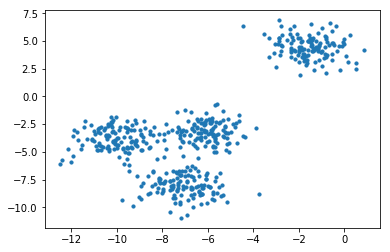

In [52]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)
plt.scatter(X[:,0],X[:,1],s=10)

In [53]:
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5743946554642042
6 0.45381428266526747


* The best number of clusters is 2

#### （4）calinski_harabaz_score
* calinski_harabaz_score定义为群内分散与群集间分散之间的比率。

In [54]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2257.879380681679
6 2034.6416194407266


### 4. Model Persistance
* 模型训练是一个昂贵的过程
* 希望保存模型以备将来重用
* 使用pickle＆joblib这可以实现

### （1） pickle

In [55]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
import pickle
s = pickle.dumps(dt)
pickle.loads(s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
type(s)

bytes

### （2）joblib
* joblib是pickle的更好扩展
* 不转换为字符串

In [58]:
from sklearn.externals import joblib
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

* Loading the file back into model

In [60]:
dt = joblib.load('dt.joblib')
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5. Validation Curves验证曲线

我们需要一个评分函数来验证一个模型， 例如分类器的准确性。 选择估计器的多个超参数的正确方法当然是网格搜索或类似方法，其选择一个或多个验证集上的分数最高的超参数。 请注意，如果我们基于验证分数优化了超参数，则验证分数就有偏差了，并且不再是一个良好的泛化估计。 为了得到正确的泛化估计，我们必须在另一个测试集上计算得分。然而，绘制单个超参数对训练分数和验证分数的影响，有时有助于发现该估计是否因为某些超参数的值 而出现过拟合或欠拟合。

* 要验证模型，我们需要评分函数。

* 创建可能的超参数配置网格。

* 选择提供最佳分数的超参数

* 如果训练得分和验证得分都很低，则估计器是不合适的。

* 如果训练得分高，验证得分低，则估计器过拟合， 否则估计会拟合得很好。

* 通常不可能有较低的训练得分和较高的验证得分。

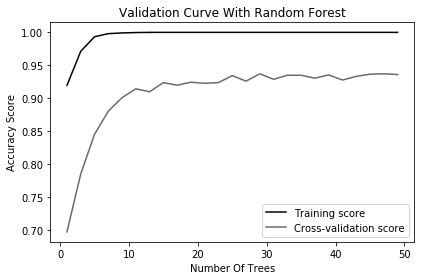

In [61]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 50, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             digits.data, 
                                             digits.target, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### 6. Learning Curves学习曲线
* 学习曲线显示在增加样本数量时训练和验证分数的变化

学习曲线显示了对于不同数量的训练样本的估计器的验证和训练评分。它可以帮助我们发现从增加更多的训 练数据中能获益多少，以及估计是否受到更多来自方差误差或偏差误差的影响。如果在增加训练集大小时，验证分数和训练 分数都收敛到一个很低的值，那么我们将不会从更多的训练数据中获益。

在下面的图中看到一个例子：朴素贝叶斯大致收敛到一个较低的分数。

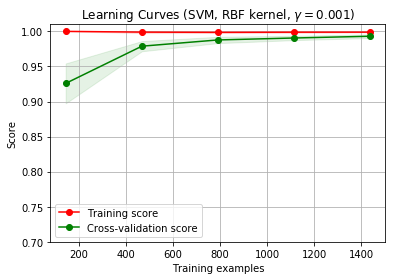

我们可能需要使用评估器或者一个当前评估器的参数化形式来学习更复杂概念（例如有一个较低的偏差）。 如果训练样本的最大时，训练分数比验证分数得分大得多，那么增加训练样本很可能会增加泛化能力。 

在下面的图中，可以看到支持向量机（SVM）可以从更多的训练样本中获益。

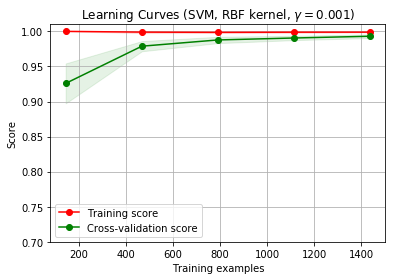

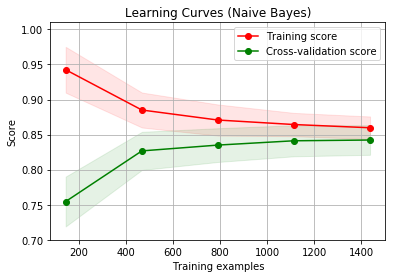

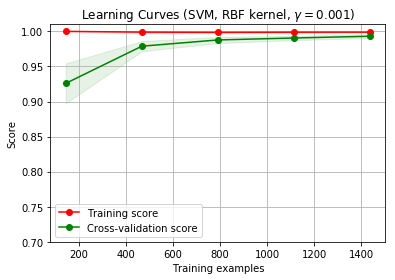

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()